In [1]:
#Time Series Analysis - Step by Step  Implementation ARMA Model

#Data_Import--->Data_Cleaning--->Stationary_Check--->Model_Training--->Prediction--->prediction--->Tunning

import warnings
warnings.filterwarnings('ignore')

In [2]:
#1.Data and package Import
#Data Source - Kaggle - https://www.kaggle.com/berkeleyearth/climate-change-earth-surface-temperature-data

import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima_model import ARMA
TempData = pd.read_csv('E:/datafiles/GlobalLandTemperaturesByCity.csv')
TempData.head(30)

,dt,AverageTemperature,AverageTemperatureUncertainty,City,Country,Latitude,Longitude
0,1743-11-01,6.068,1.737,Århus,Denmark,57.05N,10.33E
1,1743-12-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
2,1744-01-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
3,1744-02-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
4,1744-03-01,NaN,NaN,Århus,Denmark,57.05N,10.33E
5,1744-04-01,5.788,3.624,Århus,Denmark,57.05N,10.33E
6,1744-05-01,10.644,1.283,Århus,Denmark,57.05N,10.33E
7,1744-06-01,14.051,1.347,Århus,Denmark,57.05N,10.33E
8,1744-07-01,16.082,1.396,Århus,Denmark,57.05N,10.33E
9,1744-08-01,NaN,NaN,Århus,Denmark,57.05N,10.33E


In [3]:
#2.Data Cleaning

#For Time Series Model we need one index column for model prediction
#We will drop unnecessary columns and keep only one column for model prediction

TempData = TempData.dropna()
df_Denamrk = TempData[TempData.Country == "Denmark"]

df_Denamrk.index = pd.to_datetime(df_Denamrk.dt) #Making dt column in dataset as index column
  
df_Denamrk = df_Denamrk.drop(['dt','AverageTemperatureUncertainty'], axis=1)
df_Denamrk.describe()

,AverageTemperature
count,12664.000000
mean,7.802640
std,6.648288
min,-7.816000
25%,2.084000
50%,7.200000
75%,14.190500
max,21.437000


In [4]:
ts = df_Denamrk['AverageTemperature']
ts

dt
1743-11-01     6.068
1744-04-01     5.788
1744-05-01    10.644
1744-06-01    14.051
1744-07-01    16.082
               ...  
2013-04-01     6.026
2013-05-01    12.774
2013-06-01    15.685
2013-07-01    18.735
2013-08-01    18.067
Name: AverageTemperature, Length: 12664, dtype: float64

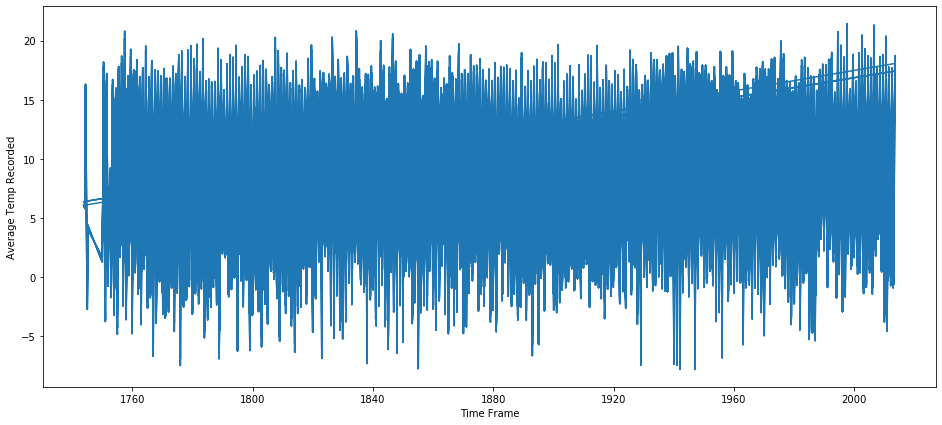

In [5]:
#2.Data Exploration

plt.figure(figsize=(16,7))
fig = plt.figure(1)
ax1 = fig.add_subplot(111)
ax1.set_xlabel('Time Frame')
ax1.set_ylabel('Average Temp Recorded')
ax1.plot(ts)

In [6]:
#3.Stationary check

# Perform Augmented Dickey-Fuller test:
# ADF Test - null hypothesis - non-stationary - if p-value < 5% reject null hypothesis

from statsmodels.tsa.stattools import adfuller

adfuller_result = adfuller(ts, autolag='AIC')

print(f'ADF Statistic: {adfuller_result[0]}')

print(f'p-value: {adfuller_result[1]}')

for key, value in adfuller_result[4].items():
    print('Critial Values:')
    print(f'   {key}, {value}')
    
#Note:- Here our p-value<5% so we will reject null_hypothesis and accept alternative_hypothesis
#alternative_hypothesis means time series data is stationary because it doesnt have seasonality trend in it.

ADF Statistic: -14.764430391800534
p-value: 2.3746970456365803e-27
Critial Values:
   1%, -3.430868192869495
Critial Values:
   5%, -2.86176901566292
Critial Values:
   10%, -2.566891900059256


In [7]:
#ARMA Model:-

newmodel = ARMA(ts,order = (1,1))
results = newmodel.fit()

predictions = results.predict('01/01/1990', '01/01/1991')

c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


In [8]:
#We are keeping the actual values aside to check the accuracy

actuals = df_Denamrk['01/01/1990': '01/01/1991']['AverageTemperature'][0:13]

In [9]:
#How do we see if we have predictions and actuals by using MAE (Mean_Absolute_Error)

from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

#Note:- In this case we can see that MAE value is 1.812791
#In our previous ARMA model we have used order (1,1) but we are not sure whether they are best order
#Now comes the model tuning 

MAE: 1.812791


In [10]:
#5.Model Tunning

#We have trained our model by using ARMA order(1,1) and we got a MAE: 1.812791 by using predictions,actuals
#Now we are going to tune our model by using range of MAE values from (0 to 4) by different combinations

import itertools
i = j = range(0, 4)
ij = itertools.product(i,j)
for parameters in ij:
    try:
        mod = ARMA(ts,order=parameters)
        results = mod.fit()
        print('ARMA{} - AIC:{}'.format(parameters, results.aic))
    except:
        continue

ARMA(0, 0) - AIC:83922.21129983963


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\stats

ARMA(0, 1) - AIC:72682.7946395372


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\stats

ARMA(0, 3) - AIC:63785.44572705053


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(1, 0) - AIC:69020.31146791065


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(1, 1) - AIC:65268.10421609718


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(1, 2) - AIC:63179.84801383666


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(1, 3) - AIC:66639.60428407857


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(2, 0) - AIC:60366.30909260651


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\stats

ARMA(2, 2) - AIC:52219.29608268023


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(2, 3) - AIC:50711.73353643209


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(3, 0) - AIC:56175.94555217999


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(3, 1) - AIC:53338.63499200847


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(3, 2) - AIC:50395.10641152544


c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:581: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it has no'
c:\users\lenovo\appdata\local\programs\python\python38\lib\site-packages\statsmodels\tsa\base\tsa_model.py:585: ValueWarning: A date index has been provided, but it is not monotonic and so will be ignored when e.g. forecasting.
  warnings.warn('A date index has been provided, but it is not'


ARMA(3, 3) - AIC:50388.87208446438


In [11]:
#Here (AIC) means Akaike information criterion which ever combination gives lowest AIC that combination
#is considered as the best model in our case.

#AIC equation AIC = ( -2ln(L) + 2k ), where L = likelihood and k = number of parameters

#AIC results are intrepreted by using eauation p = exp(((AIC(min) -AIC(i))/2) 
#where “exp” means “e” to the power of the parenthesis

#Now the lowest combination here is ARMA(3, 3) - AIC:50388.87208446438 which is stored in result
#we are using this ARMA(3, 3) - AIC:50388.87208446438 to predict our model and see whether MAE: 1.812791
#has been reduced by using this model ARMA(3, 3) - AIC:50388.87208446438 with lowest AIC and compare both
#MAE values.

predictions = results.predict('01/01/1990', '01/01/1991')

In [12]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(actuals[0:13], predictions)
print('MAE: %f' % mae)

#Note:- We can see that ARMA with order (1,1) has MAE: 1.812791 and ARMA with order (3,3) has MAE: 1.494607
#Which has been reduced when we tunned over model with a range of (0,4) and lowest combination is ARMA(3,3)

MAE: 1.494607
